In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('lab3.csv')

In [3]:
df.describe()

,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
count,33178.000000,33178.000000,32165.000000,33178.000000,33178.000000,33178.000000
mean,-91.084343,38.830389,50.500016,8596.977395,38248.093857,2.500710
std,15.070689,5.359397,28.865519,12978.758221,17469.135891,0.595747
min,-176.636755,17.962234,1.000000,0.000000,0.000000,0.000000
25%,-97.219483,35.383955,26.000000,656.000000,28903.750000,2.360000
50%,-88.308757,39.460478,51.000000,2515.000000,35762.000000,2.550000
75%,-80.380665,42.105602,75.000000,11167.500000,45229.250000,2.740000
max,-65.292575,71.299525,100.000000,144024.000000,200001.000000,8.490000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33178 entries, 0 to 33177
Data columns (total 7 columns):
ID          33178 non-null object
LocX        33178 non-null float64
LocY        33178 non-null float64
RegDens     32165 non-null float64
RegPop      33178 non-null int64
MedHHInc    33178 non-null int64
MeanHHSz    33178 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.8+ MB


In [5]:
df = df.replace(r'^\s*$', np.nan, regex=True) # replace empty with NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33178 entries, 0 to 33177
Data columns (total 7 columns):
ID          33178 non-null object
LocX        33178 non-null float64
LocY        33178 non-null float64
RegDens     32165 non-null float64
RegPop      33178 non-null int64
MedHHInc    33178 non-null int64
MeanHHSz    33178 non-null float64
dtypes: float64(4), int64(2), object(1)
memory usage: 1.8+ MB


In [7]:
df

,ID,LocX,LocY,RegDens,RegPop,MedHHInc,MeanHHSz
0,00601,-66.749472,18.180103,70.0,19143,9888,3.24
1,00602,-67.180247,18.363285,83.0,42042,11384,3.10
2,00603,-67.134224,18.448619,86.0,55592,10748,2.84
3,00604,-67.136995,18.498987,83.0,3844,31199,3.00
4,00606,-66.958807,18.182151,65.0,6449,9243,3.20
...,...,...,...,...,...,...,...
33173,99927,-133.606896,56.337957,15.0,136,17143,2.03
33174,99929,-132.338228,56.409507,5.0,2424,43696,2.49
33175,99950,-131.466339,55.875767,2.0,47,37708,2.14
33176,999HH,-132.288850,55.539963,NaN,0,0,0.00


### Plot the distribution

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

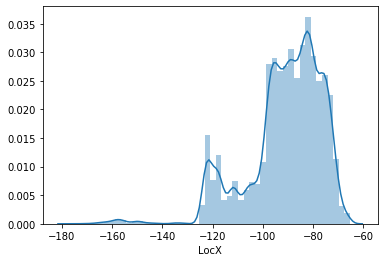

In [9]:
sns.distplot(df['LocX'])

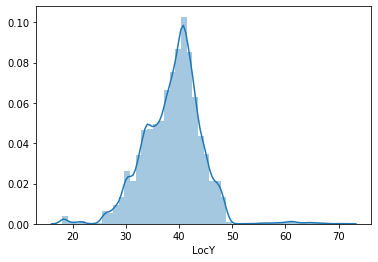

In [10]:
sns.distplot(df['LocY'])

In [14]:
sns.distplot(df['RegDens'], na.rm = True)

SyntaxError: keyword can't be an expression (<ipython-input-14-180915d985c9>, line 1)

In [15]:
RegDens = df['RegDens'].fillna(0)

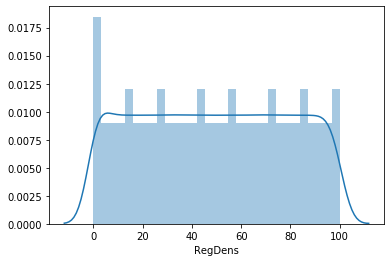

In [16]:
sns.distplot(RegDens)

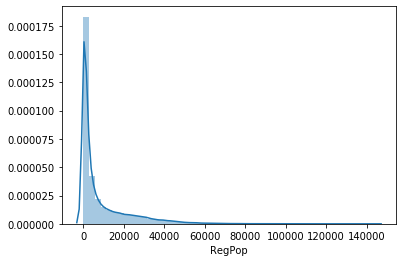

In [19]:
sns.distplot(df['RegPop'])

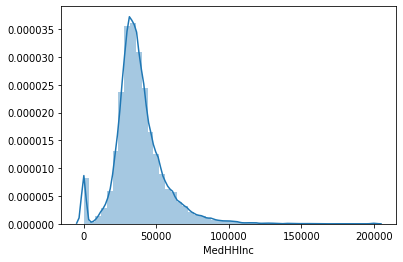

In [20]:
sns.distplot(df['MedHHInc'])

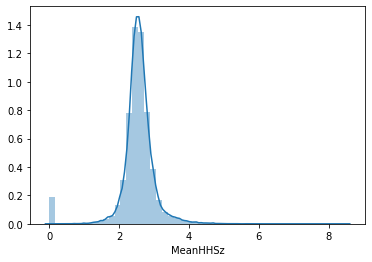

In [21]:
sns.distplot(df['MeanHHSz']) 

### The last two distplots shows anomalies in MeanHHSz and MedHHInc. 

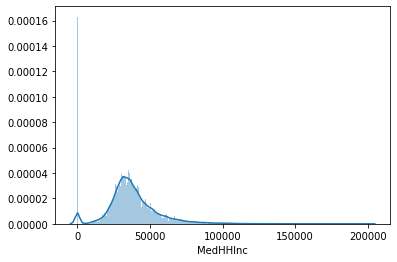

In [22]:
sns.distplot(df['MedHHInc'], bins = 1000)

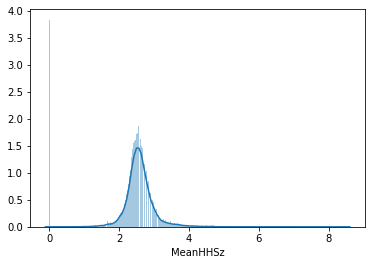

In [23]:
sns.distplot(df['MeanHHSz'], bins =1000) 

### FaceTGrid

In [25]:
g = sns.FacetGrid(df, col = "MeanHHSz")
plt.show()

ValueError: Image size of 86832x216 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x00000200EC7C1948> (for post_execute):


ValueError: Image size of 86832x216 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 86832x216 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 86832x216 with 402 Axes>

### Clustering

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [30]:
X = df[['LocX', 'LocY']]

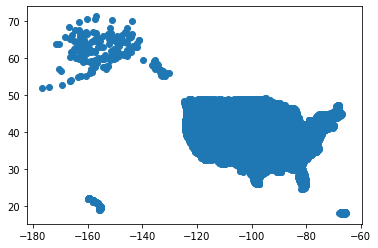

In [31]:
plt.scatter(X['LocX'], X['LocY'])

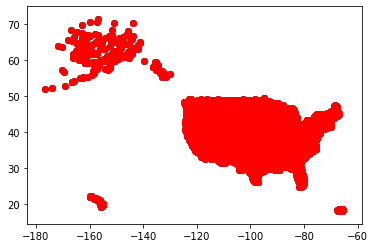

In [32]:
K=3

Centroids = (X.sample(n=K))
plt.scatter(X['LocX'], X['LocY'],c='black')
plt.scatter(X['LocX'], X['LocY'],c='red')

In [33]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["LocX"]-row_d["LocX"])**2
            d2=(row_c["LocY"]-row_d["LocY"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["LocX","LocY"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['LocY'] - Centroids['LocY']).sum() + (Centroids_new['LocX'] - Centroids['LocX']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["LocY","LocX"]]

C:\Users\Tan Chang Jung\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Tan Chang Jung\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


-2.9941164135713976
-4.63396470952992
-5.650516662140518
-3.74110130622487
-2.424417775052447
-1.865423937959065
-1.177934379531223
-0.7072653782818463
-0.3263387001307194
-0.1693340732126245
-0.07511088556064038
-0.02409778034367349
-0.010607856938811722
-0.006520515322044673
-0.0011121882502678204
0.0


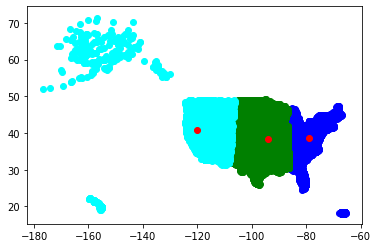

In [34]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["LocX"],data["LocY"],c=color[k])
plt.scatter(Centroids["LocX"],Centroids["LocY"],c='red')